In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from calendar import month_abbr
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec

%matplotlib notebook

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
rain = pd.read_csv('precipitation.csv')
fires = pd.read_csv('amazon.csv', encoding='cp1252')

In [3]:
def translate_month(row):
    months = {'Janeiro': 'January',
             'Fevereiro': 'February',
             'Março': 'March',
             'Abril': 'April',
             'Maio': 'May',
             'Junho': 'June',
             'Julho': 'July',
             'Agosto': 'August',
             'Setembro': 'September',
             'Outubro': 'October',
             'Novembro': 'November',
             'Dezembro': 'December'}
    
    return months.get(row)

def abbreviated_state(row):
    states = {'AC': 'Acre',
              'AL': 'Alagoas',
              'AP': 'Amapá',
              'AM': 'Amazonas',
              'BA': 'Bahia',
              'CE': 'Ceará',
              'DF': 'Distrito Federal',
              'ES': 'Espírito Santo',
              'GO': 'Goiás',
              'MA': 'Maranhão',
              'MT': 'Mato Grosso',
              'MS': 'Mato Grosso do Sul',
              'MG': 'Minas Gerais',
              'PA': 'Pará',
              'PB': 'Paraíba',
              'PR': 'Paraná',
              'PE': 'Pernambuco',
              'PI': 'Piauí',
              'RJ': 'Rio de Janeiro',
              'RN': 'Rio Grande do Norte',
              'RS': 'Rio Grande do Sul',
              'RO': 'Rondônia',
              'RR': 'Roraima',
              'SC': 'Santa Catarina',
              'SP': 'São Paulo',
              'SE': 'Sergipe',
              'TO': 'Tocantins'}
    
    return states.get(row) 

def filter_amazon_states(df):
    return df['state'].isin(['Acre', 'Amapá', 'Amazonas', 'Mato Grosso', 'Maranhão', 'Pará', 
                              'Roraima', 'Rondônia', 'Tocantins'])

def get_month_by_index(row):
    month_number = row.month
    datetime_object = datetime.strptime(str(month_number), "%m")
    return datetime_object.strftime("%B")

def get_season(row):
    datetime_object = datetime.strptime(row, "%B")
    month_number = datetime_object.month
    
    if month_number < 4:
        return 'summer'
    elif month_number > 3 and month_number < 7:
        return 'autumn'
    elif month_number > 6 and month_number < 10:
        return 'winter'
    else:
        return 'spring'
    
def get_index_by_month(row):
    datetime_object = datetime.strptime(row['month'], "%B")
    month_number = datetime_object.month
    
    return pd.to_datetime(f"{row['year']}-{month_number}").strftime('%Y-%m')

def normalize_fires(row):
    data = fires['number']
    return (row - min(data)) / (max(data) - min(data))

def normalize_rain(row):
    data = rain['precipitation']
    return (row - min(data)) / (max(data) - min(data))

In [4]:
fires.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [5]:
rain.head()

,state,date,precipitation
0,BA,31/01/1998,63.6
1,BA,28/02/1998,55.6
2,BA,31/03/1998,117.2
3,BA,30/04/1998,206.0
4,BA,31/05/1998,250.9


In [6]:
fires['state'] = fires['state'].apply(lambda x: 'Amapá' if x == 'Amapa' else x)
fires['state'] = fires['state'].apply(lambda x: 'Maranhão' if x == 'Maranhao' else x)

rain['date'] = pd.to_datetime(rain['date'])
fires['date'] = pd.to_datetime(fires['date'])
rain['year'] = rain['date'].apply(lambda x: x.year)
rain['state'] = rain['state'].apply(abbreviated_state)

fires = fires[filter_amazon_states(fires)]
rain = rain[filter_amazon_states(rain)]
fires['number'] = fires['number'].apply(lambda x: np.round(x))

rain['month'] = rain['date'].apply(get_month_by_index)
fires['month'] = fires['month'].apply(translate_month)

In [7]:
fires['scale'] = fires['number'].apply(normalize_fires)
rain['scale'] = rain['precipitation'].apply(normalize_rain)

In [8]:
rain['date'] = rain['date'].apply(lambda x: x.strftime('%Y-%m'))
fires['date'] = fires.apply(get_index_by_month, axis=1)

In [9]:
fires = fires[fires['date'] > '2012-12']
rain = rain[rain['date'] > '2012-12']

In [10]:
rain['season'] = rain['month'].apply(get_season)
fires['season'] = fires['month'].apply(get_season)

In [11]:
rain['year'] = rain['date'].apply(lambda x: pd.to_datetime(x).year)

In [12]:
rain.head()

,state,date,precipitation,year,month,scale,season
419,Roraima,2013-01,0.0,2013,January,0.000000,summer
420,Roraima,2013-02,78.4,2013,February,0.102203,summer
421,Roraima,2013-03,13.8,2013,March,0.017990,summer
422,Roraima,2013-04,168.6,2013,April,0.219789,autumn
423,Roraima,2013-05,314.0,2013,May,0.409334,autumn


In [13]:
fires.head()

,year,state,month,number,date,scale,season
15,2013,Acre,January,0.0,2013-01,0.000000,summer
16,2014,Acre,January,0.0,2014-01,0.000000,summer
17,2015,Acre,January,1.0,2015-01,0.001002,summer
18,2016,Acre,January,12.0,2016-01,0.012024,summer
19,2017,Acre,January,0.0,2017-01,0.000000,summer


In [14]:
rain['date'] = rain['date'].apply(lambda x: pd.to_datetime(pd.to_datetime(x).strftime('%Y-%m')))

In [15]:
rain.dtypes

state                    object
date             datetime64[ns]
precipitation           float64
year                      int64
month                    object
scale                   float64
season                   object
dtype: object

In [16]:
fires['date'] = fires['date'].apply(lambda x: pd.to_datetime(pd.to_datetime(x).strftime('%Y-%m')))

<IPython.core.display.Javascript object>


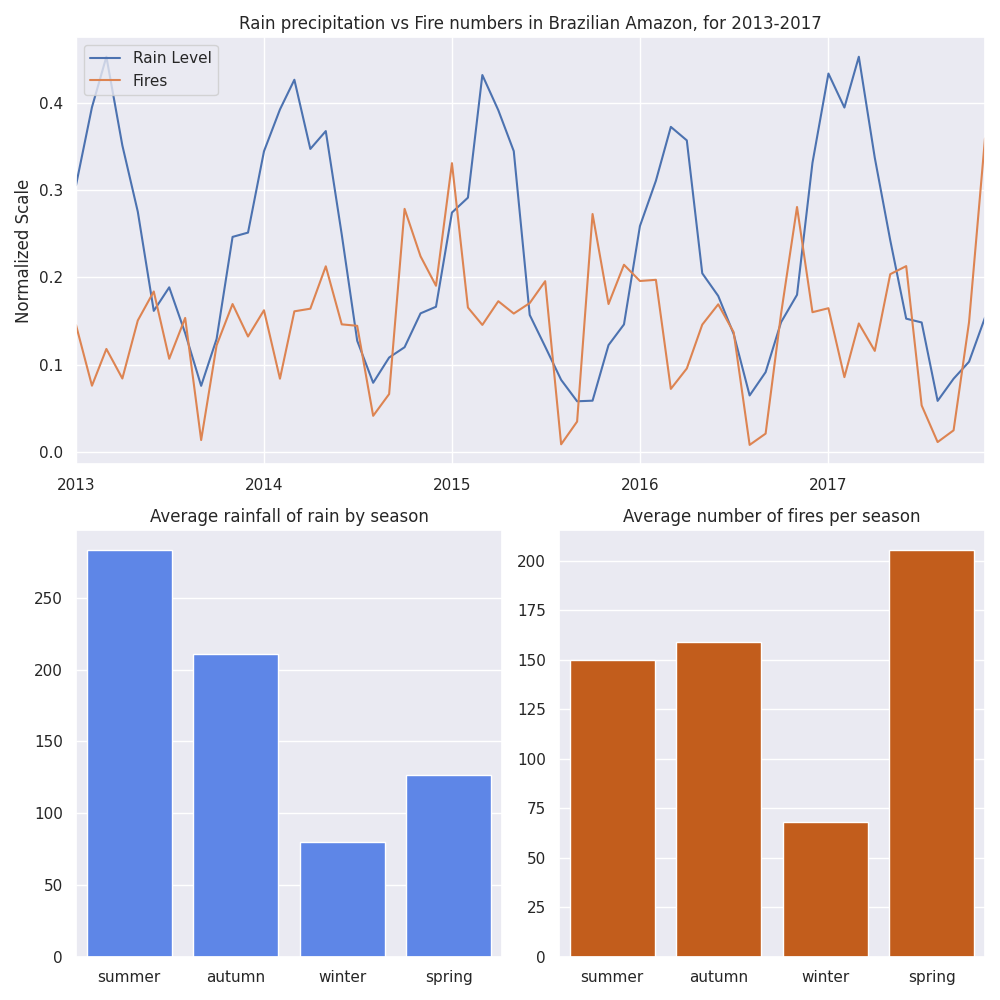

In [17]:
fig = plt.figure(tight_layout=True, figsize=(10,10))
gs = gridspec.GridSpec(2, 2)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

sns.lineplot(x='date', y='scale', data=rain, palette='mako_r', 
            ax=ax1, ci=None)

sns.lineplot(x='date', y='scale', data=fires, palette='OrRd', 
            ax=ax1, ci=None)

ax1.set_xlabel('')    
ax1.set_ylabel('Normalized Scale')
ax1.set_title('Rain precipitation vs Fire numbers in Brazilian Amazon, for 2013-2017')

ax1.xaxis.set_major_locator(
    mdates.AutoDateLocator(minticks=1, interval_multiples=False))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

ax1.legend(["Rain Level", "Fires"], loc='upper left')

ax1.set_xlim(pd.to_datetime("2013-01"), pd.to_datetime("2017-11"))

# second plot
sns.barplot(x='season', y='precipitation', data=rain, color="#477cfe", ci=None, ax=ax2)
ax2.set_title('Average rainfall of rain by season')
ax2.set_xlabel('')
ax2.set_ylabel('')

# third plot
sns.barplot(x='season', y='number', data=fires, color="#de5700", ci=None, ax=ax3)
ax3.set_title('Average number of fires per season')
ax3.set_xlabel('')    
ax3.set_ylabel('')

plt.savefig('amazon.png')